In [1]:
import GPUtil
GPUtil.showUtilization()

| ID | GPU | MEM |
------------------
|  0 |  0% | 97% |
|  1 |  0% |  0% |
|  2 |  0% |  0% |
|  3 |  0% |  0% |
|  4 |  0% |  0% |
|  5 |  0% |  0% |
|  6 |  0% |  0% |
|  7 |  0% |  0% |


In [2]:
# !split -d -l 500 CoCl2_geno.txt geno_part_

In [3]:
import dask.dataframe as dd
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import torch
import gpytorch

In [5]:
import pyarrow as pa
import pyarrow.parquet as pq

In [6]:
geno_file_list = []
for path, currentDirectory, files in os.walk("96ghpptzvf-4/SData2/"):
    for file in files:
        if file.endswith("geno.txt"):
            geno_file_list.append(file)

In [7]:
geno_file_list = list(set(geno_file_list))

In [8]:
env_list = [file.split('_')[0] for file in geno_file_list]

In [9]:
env_list = sorted(env_list)

In [10]:
env_list

['CoCl2',
 'CuSO4',
 'Glucose',
 'Glucose2',
 'H2O2',
 'NaCl',
 'Rapamycin',
 'Zeocin']

In [11]:
# cm = 'split -d -l 500 ENV_geno.txt split_genos/ENV_geno_part_'

# cmds = [cm.replace('ENV', env) for env in env_list]

# with open('cmd.txt', 'w') as f:
#     for line in cmds:
#         f.write(line)
#         f.write('\n')

In [12]:
def convert_geno(env):
    
    file_list = []
    for path, currentDirectory, files in os.walk("96ghpptzvf-4/SData2/split_genos/"):
        for file in files:
            if file.startswith(env+"_") and not file.endswith('.txt'):
                file_list.append(file)

    file_list = np.sort(file_list)

    df = pd.read_csv("96ghpptzvf-4/SData2/split_genos/" + file_list[0], sep='\t', engine="python", nrows=5)

    N = df.shape[1]

    dtypes = dict(zip(list(df.columns), ['float64' for _ in range(N)]))

    df = pd.read_csv("96ghpptzvf-4/SData2/split_genos/" + file_list[0], sep='\t', engine="python", dtype=dtypes)

    geno_t = torch.tensor(df.iloc[:,3:].to_numpy())
    geno_t = geno_t.cuda()

    for file in file_list[1:]:
        if not file.endswith('00'):
            print(file)
            df = pd.read_csv("96ghpptzvf-4/SData2/split_genos/"+file, sep='\t', 
                             header=None, index_col=0, engine="python", dtype=dtypes)
            geno_t = torch.cat([geno_t, torch.tensor(df.iloc[:,3:].to_numpy()).cuda()], 0)
            del df

    torch.save(geno_t, env + '_matsui_geno_t.pt')
    

In [ ]:
for env in env_list[2:]:
    convert_geno(env)

Glucose_geno_part_01
Glucose_geno_part_02
Glucose_geno_part_03
Glucose_geno_part_04
Glucose_geno_part_05
Glucose_geno_part_06
Glucose_geno_part_07
Glucose_geno_part_08
Glucose_geno_part_09
Glucose_geno_part_10
Glucose_geno_part_11
Glucose_geno_part_12
Glucose_geno_part_13
Glucose_geno_part_14
Glucose_geno_part_15
Glucose2_geno_part_01
Glucose2_geno_part_02
Glucose2_geno_part_03
Glucose2_geno_part_04
Glucose2_geno_part_05
Glucose2_geno_part_06
Glucose2_geno_part_07
Glucose2_geno_part_08
Glucose2_geno_part_09
Glucose2_geno_part_10
Glucose2_geno_part_11
Glucose2_geno_part_12
Glucose2_geno_part_13
Glucose2_geno_part_14
Glucose2_geno_part_15
H2O2_geno_part_01
H2O2_geno_part_02
H2O2_geno_part_03
H2O2_geno_part_04
H2O2_geno_part_05
H2O2_geno_part_06
H2O2_geno_part_07
H2O2_geno_part_08
H2O2_geno_part_09
H2O2_geno_part_10
H2O2_geno_part_11
H2O2_geno_part_12
H2O2_geno_part_13
H2O2_geno_part_14
H2O2_geno_part_15
NaCl_geno_part_01
NaCl_geno_part_02
NaCl_geno_part_03
NaCl_geno_part_04
NaCl_geno_par

In [25]:
env = env_list[1]

In [26]:
file_list = []
for path, currentDirectory, files in os.walk("96ghpptzvf-4/SData2/split_genos/"):
    for file in files:
        if file.startswith(env) and not file.endswith('.txt'):
            file_list.append(file)

In [27]:
file_list = np.sort(file_list)

In [28]:
df = pd.read_csv("96ghpptzvf-4/SData2/split_genos/" + file_list[0], sep='\t', engine="python", nrows=5)

In [29]:
N = df.shape[1]

In [30]:
dtypes = dict(zip(list(df.columns), ['float64' for _ in range(N)]))

In [31]:
df = pd.read_csv("96ghpptzvf-4/SData2/split_genos/" + file_list[0], sep='\t', engine="python", dtype=dtypes)

In [32]:
geno_t = torch.tensor(df.iloc[:,3:].to_numpy())
geno_t = geno_t.cuda()

In [ ]:
file_list[1:]

In [ ]:
for file in file_list[1:]:
    if not file.endswith('00'):
        print(file)
        df = pd.read_csv("96ghpptzvf-4/SData2/split_genos/"+file, sep='\t', header=None, index_col=0, engine="python", dtype=dtypes)
        geno_t = torch.cat([geno_t, torch.tensor(df.iloc[:,3:].to_numpy()).cuda()], 0)
        del df

In [11]:
torch.save(geno_t, env+'matsui_geno_t.pt')

In [13]:
geno_t = torch.load('matsui_geno_t.pt')

In [83]:
geno_t

tensor([[1., 2., 2.,  ..., 0., 0., 0.],
        [1., 2., 2.,  ..., 0., 0., 0.],
        [1., 2., 2.,  ..., 0., 0., 0.],
        ...,
        [1., 2., 2.,  ..., 1., 1., 1.],
        [1., 2., 2.,  ..., 1., 1., 1.],
        [1., 2., 2.,  ..., 1., 1., 1.]], device='cuda:0', dtype=torch.float64)

In [84]:
geno_t = torch.transpose(geno_t, 0, 1)

#### Are the genotypes for different env different? 

In [17]:
df1 = pd.read_csv("96ghpptzvf-4/SData2/CoCl2_geno.txt", sep='\t', nrows=5, engine='python')

In [16]:
df = pd.read_csv("96ghpptzvf-4/SData2/CuSO4_geno.txt", sep='\t', nrows=5, engine='python')

In [23]:
df

,c,p,gp,BYa_1C_A10.y39_A012,BYa_1C_A10.y39_A02,BYa_1C_A10.y39_A03,BYa_1C_A10.y39_A04,BYa_1C_A10.y39_A05,BYa_1C_A10.y39_A07,BYa_1C_A10.y39_A08,...,BYx_6C_H7.y44_G04,BYx_6C_H7.y44_G05,BYx_6C_H7.y44_G06,BYx_6C_H7.y44_G07,BYx_6C_H7.y44_G08,BYx_6C_H7.y44_G09,BYx_6C_H7.y44_H011,BYx_6C_H7.y44_H02,BYx_6C_H7.y44_H04,BYx_6C_H7.y44_H08
1_30335,1,30335,30335,1,2,2,1,1,2,1,...,0,1,0,0,1,1,0,0,0,0
1_30817,1,30817,30817,1,2,2,1,1,2,1,...,0,1,0,0,1,1,0,0,0,0
1_31391,1,31391,31391,1,2,2,1,1,2,1,...,0,1,0,0,1,1,0,0,0,0
1_31635,1,31635,31635,1,2,2,1,1,2,1,...,0,1,0,0,1,1,0,0,0,0
1_31755,1,31755,31755,1,2,2,1,1,2,1,...,0,1,0,0,1,1,0,0,0,0


In [19]:
df1

,c,p,gp,BYa_1C_A10.y39_A012,BYa_1C_A10.y39_A02,BYa_1C_A10.y39_A03,BYa_1C_A10.y39_A04,BYa_1C_A10.y39_A05,BYa_1C_A10.y39_A07,BYa_1C_A10.y39_A08,...,BYx_6C_H7.y44_G03,BYx_6C_H7.y44_G04,BYx_6C_H7.y44_G05,BYx_6C_H7.y44_G06,BYx_6C_H7.y44_G07,BYx_6C_H7.y44_G09,BYx_6C_H7.y44_H011,BYx_6C_H7.y44_H02,BYx_6C_H7.y44_H04,BYx_6C_H7.y44_H08
1_30335,1,30335,30335,1,2,2,1,1,2,1,...,0,0,1,0,0,1,0,0,0,0
1_30817,1,30817,30817,1,2,2,1,1,2,1,...,0,0,1,0,0,1,0,0,0,0
1_31391,1,31391,31391,1,2,2,1,1,2,1,...,0,0,1,0,0,1,0,0,0,0
1_31635,1,31635,31635,1,2,2,1,1,2,1,...,0,0,1,0,0,1,0,0,0,0
1_31755,1,31755,31755,1,2,2,1,1,2,1,...,0,0,1,0,0,1,0,0,0,0


#### seems that different env have different individuals

### Examine phenotypes

In [26]:
pheno = pd.read_csv("96ghpptzvf-4/SData6/CoCl2_pheno.txt", sep='\t', engine="python")

In [50]:
pheno.head()

,pheno,MATa,MATalpha,qnorm,MATa_mid,MATalpha_mid,midparent
geno,,,,,,,
BYa_1C_A10.y39_A012,-0.021705,y39_A012,BYa_1C_A10,-0.021147,0.074002,-0.336769,-0.131384
BYa_1C_A10.y39_A02,-0.184045,y39_A02,BYa_1C_A10,-0.924553,-0.286352,-0.336769,-0.311561
BYa_1C_A10.y39_A03,-0.133887,y39_A03,BYa_1C_A10,-0.640047,-0.896266,-0.336769,-0.616517
BYa_1C_A10.y39_A04,-0.021991,y39_A04,BYa_1C_A10,-0.022688,0.593958,-0.336769,0.128595
BYa_1C_A10.y39_A05,0.088438,y39_A05,BYa_1C_A10,0.574957,0.576434,-0.336769,0.119833


In [36]:
pheno = pheno.set_index('geno')

In [28]:
geno_t.shape

torch.Size([7742, 187177])

In [42]:
ids = list(df1.columns[3:])

In [45]:
pheno = pheno.loc[ids]

In [46]:
pheno

,pheno,MATa,MATalpha,qnorm,MATa_mid,MATalpha_mid,midparent
geno,,,,,,,
BYa_1C_A10.y39_A012,-0.021705,y39_A012,BYa_1C_A10,-0.021147,0.074002,-0.336769,-0.131384
BYa_1C_A10.y39_A02,-0.184045,y39_A02,BYa_1C_A10,-0.924553,-0.286352,-0.336769,-0.311561
BYa_1C_A10.y39_A03,-0.133887,y39_A03,BYa_1C_A10,-0.640047,-0.896266,-0.336769,-0.616517
BYa_1C_A10.y39_A04,-0.021991,y39_A04,BYa_1C_A10,-0.022688,0.593958,-0.336769,0.128595
BYa_1C_A10.y39_A05,0.088438,y39_A05,BYa_1C_A10,0.574957,0.576434,-0.336769,0.119833
...,...,...,...,...,...,...,...
BYx_6C_H7.y44_G09,-0.095031,y44_G09,BYx_6C_H7,-0.423639,0.132665,-0.153992,-0.010663
BYx_6C_H7.y44_H011,-0.135403,y44_H011,BYx_6C_H7,-0.648964,-0.928147,-0.153992,-0.541069
BYx_6C_H7.y44_H02,-0.098523,y44_H02,BYx_6C_H7,-0.442672,-0.896922,-0.153992,-0.525457


### test Diploid kernel

In [ ]:
tensor = torch.rand(4, 100000, 100000)

In [93]:
import Di
Di.set_params(geno_t[:50000])
N, L = geno_t.shape

RuntimeError: CUDA out of memory. Tried to allocate 18.63 GiB (GPU 0; 79.35 GiB total capacity; 68.57 GiB already allocated; 4.02 GiB free; 73.51 GiB reserved in total by PyTorch)

In [55]:
p = .2

In [56]:
from torch.utils.data import random_split
train, test = random_split(range(Di.N), lengths=[round(Di.N*p), Di.N-round(Di.N*p)])

In [57]:
y = np.array(pheno.pheno)
y = torch.tensor(y)

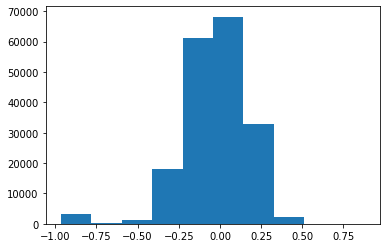

In [60]:
plt.hist(np.array(y))
plt.show()

In [61]:
idc = torch.arange(Di.N)

In [62]:
train_x = idc[train]
train_y = torch.tensor(y[train])
test_x = idc[test]
test_y = torch.tensor(y[test])

/scratch/local/24659324/ipykernel_47191/2969457204.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_y = torch.tensor(y[train])
/scratch/local/24659324/ipykernel_47191/2969457204.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_y = torch.tensor(y[test])


In [67]:
train_x = train_x.cuda()
train_y = train_y.cuda().float()

In [68]:
likelihood = gpytorch.likelihoods.GaussianLikelihood()
# initialize the new model
# model = Di.DiGPModel2(train_x, train_y, likelihood)
# model = Di.RBFGPModel(train_x, train_y, likelihood)
model = Di.LinGPModel(train_x, train_y, likelihood)

In [69]:
model = model.cuda().double()
likelihood = likelihood.cuda()

In [70]:
# model.covar_module.raw_lda = torch.nn.Parameter(torch.tensor(-8.))
# model.covar_module.raw_eta = torch.nn.Parameter(torch.tensor(-12.))

# model.covar_module.raw_ld1 = torch.nn.Parameter(torch.tensor(-8.))
# model.covar_module.raw_et1 = torch.nn.Parameter(torch.tensor(-12.))

In [71]:
model.train()
output = model(train_x)

TypeError: Invalid shape (4, 7742, 7742) for image data

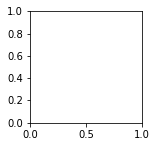

In [81]:
plt.matshow(Di.D_t.cpu().numpy())

In [73]:
model.train()
likelihood.train()
losses = Di.train_model(model, likelihood, train_x, train_y, training_iter=300, lr=.2)

0


/home/juannanzhou/.local/lib/python3.8/site-packages/gpytorch/utils/linear_cg.py:321: NumericalWarning: CG terminated in 1000 iterations with average residual norm 3.368513864038262 which is larger than the tolerance of 1 specified by gpytorch.settings.cg_tolerance. If performance is affected, consider raising the maximum number of CG iterations by running code in a gpytorch.settings.max_cg_iterations(value) context.
  warnings.warn(
/home/juannanzhou/.local/lib/python3.8/site-packages/gpytorch/utils/linear_cg.py:321: NumericalWarning: CG terminated in 1000 iterations with average residual norm 3.5045316395052493 which is larger than the tolerance of 1 specified by gpytorch.settings.cg_tolerance. If performance is affected, consider raising the maximum number of CG iterations by running code in a gpytorch.settings.max_cg_iterations(value) context.
  warnings.warn(
/home/juannanzhou/.local/lib/python3.8/site-packages/gpytorch/utils/linear_cg.py:321: NumericalWarning: CG terminated in 10

20


/home/juannanzhou/.local/lib/python3.8/site-packages/gpytorch/utils/linear_cg.py:321: NumericalWarning: CG terminated in 1000 iterations with average residual norm 56.979909965264326 which is larger than the tolerance of 1 specified by gpytorch.settings.cg_tolerance. If performance is affected, consider raising the maximum number of CG iterations by running code in a gpytorch.settings.max_cg_iterations(value) context.
  warnings.warn(
/home/juannanzhou/.local/lib/python3.8/site-packages/gpytorch/utils/linear_cg.py:321: NumericalWarning: CG terminated in 1000 iterations with average residual norm 81.29076600231299 which is larger than the tolerance of 1 specified by gpytorch.settings.cg_tolerance. If performance is affected, consider raising the maximum number of CG iterations by running code in a gpytorch.settings.max_cg_iterations(value) context.
  warnings.warn(
/home/juannanzhou/.local/lib/python3.8/site-packages/gpytorch/utils/linear_cg.py:321: NumericalWarning: CG terminated in 10

KeyboardInterrupt: 

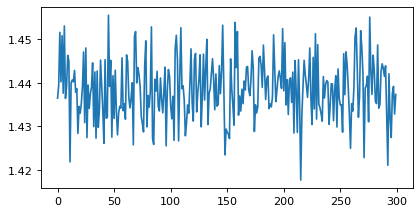

In [61]:
figure(figsize=(6, 3), dpi=80)
plt.plot(losses)
plt.show()

In [62]:
test_x = test_x.cuda()

In [63]:
model.eval()
f_preds = model(test_x)
y_preds = likelihood(model(test_x))

In [64]:
f_mean = f_preds.mean.cpu()

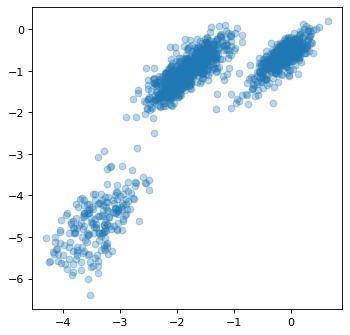

r2 = 0.641949
R2 = 0.641746
mse = 0.732576


In [65]:
figure(figsize=(5, 5), dpi=80)
plt.plot(f_mean.detach().numpy(), y[test], 'o', alpha=.3)
plt.show()
print('r2 = %f'%pearsonr(f_mean.detach().numpy(), y[test])[0]**2)
print('R2 = %f'%r2(y[test], f_mean.detach().numpy()))
print('mse = %f'%mse(f_mean.detach().numpy(), y[test]))